In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets, utils
import matplotlib.pyplot as plt

In [3]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
# Normalize the values to range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# one-hot encoded vectors
train_labels = utils.to_categorical(train_labels, 10)
test_labels = utils.to_categorical(test_labels, 10)

In [5]:
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [6]:
# basic CNN model

def build_model():
  model = models.Sequential([
      layers.Conv2D(128, (3,3), activation='relu', input_shape=(32,32,3)),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(32, (3,3), activation='relu'),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(10, activation='softmax')
  ])
  return model

cnn = build_model()
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = cnn.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))

test_loss, test_acc = cnn.evaluate(test_images, test_labels)
print(f"Basic Model Test Accuracy: {test_acc:.4f}")

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 97s 76ms/step - accuracy: 0.3086 - loss: 1.8540 - val_accuracy: 0.5103 - val_loss: 1.3810
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 139s 74ms/step - accuracy: 0.5250 - loss: 1.3090 - val_accuracy: 0.5922 - val_loss: 1.1555
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 93s 75ms/step - accuracy: 0.5983 - loss: 1.1254 - val_accuracy: 0.5989 - val_loss: 1.1271
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 140s 73ms/step - accuracy: 0.6409 - loss: 1.0202 - val_accuracy: 0.6251 - val_loss: 1.0644
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 74ms/step - accuracy: 0.6709 - loss: 0.9333 - val_accuracy: 0.6592 - val_loss: 0.9557
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 92s 74ms/step - accuracy: 0.6943 - loss: 0.8631 - val_accuracy: 0.6602 - val_loss: 0.9687
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 74ms/step - accuracy: 0.7207 - loss: 0.7951 - val_accuracy: 0.6750 - val_loss: 0.9265
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 92s 74ms/step - accuracy: 0.73

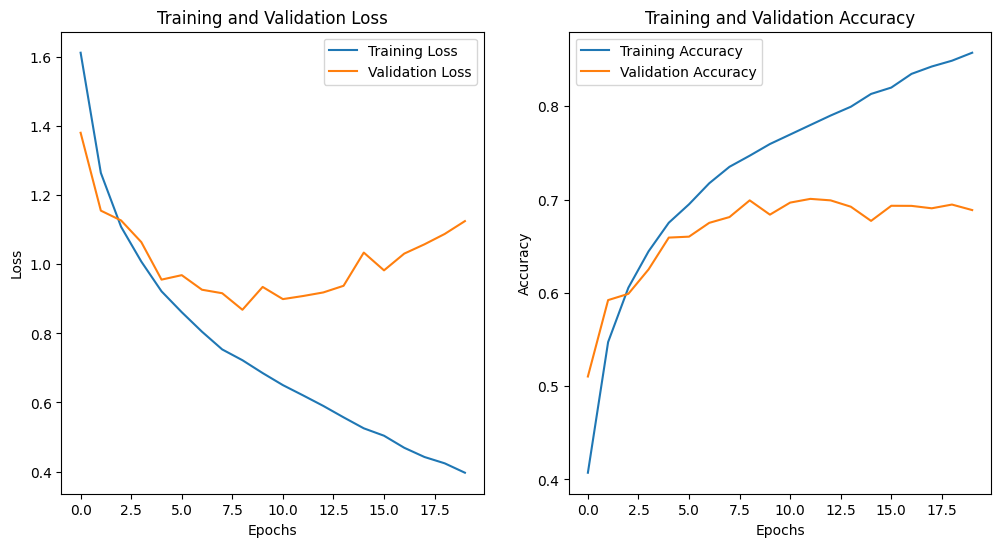

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [8]:
#model with dropout
def build_cifar10_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model


cifar10_model = build_cifar10_model()
cifar10_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])


history = cifar10_model.fit(train_images, train_labels, 
                            epochs=20, 
                            batch_size=64, 
                            validation_split=0.2)

test_loss, test_acc = cifar10_model.evaluate(val_images, val_labels)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 93s 180ms/step - accuracy: 0.2218 - loss: 2.0513 - val_accuracy: 0.4255 - val_loss: 1.5392
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 89s 178ms/step - accuracy: 0.4676 - loss: 1.4525 - val_accuracy: 0.5612 - val_loss: 1.2148
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 143s 179ms/step - accuracy: 0.5539 - loss: 1.2330 - val_accuracy: 0.6095 - val_loss: 1.1006
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 90s 179ms/step - accuracy: 0.6034 - loss: 1.1058 - val_accuracy: 0.6481 - val_loss: 0.9778
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 142s 180ms/step - accuracy: 0.6386 - loss: 1.0122 - val_accuracy: 0.6646 - val_loss: 0.9523
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 89s 178ms/step - accuracy: 0.6713 - loss: 0.9349 - val_accuracy: 0.7011 - val_loss: 0.8503
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 89s 178ms/step - accuracy: 0.6911 - loss: 0.8610 - val_accuracy: 0.6965 - val_loss: 0.8516
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 88s 177ms/step - accuracy: 0.7119 - loss:

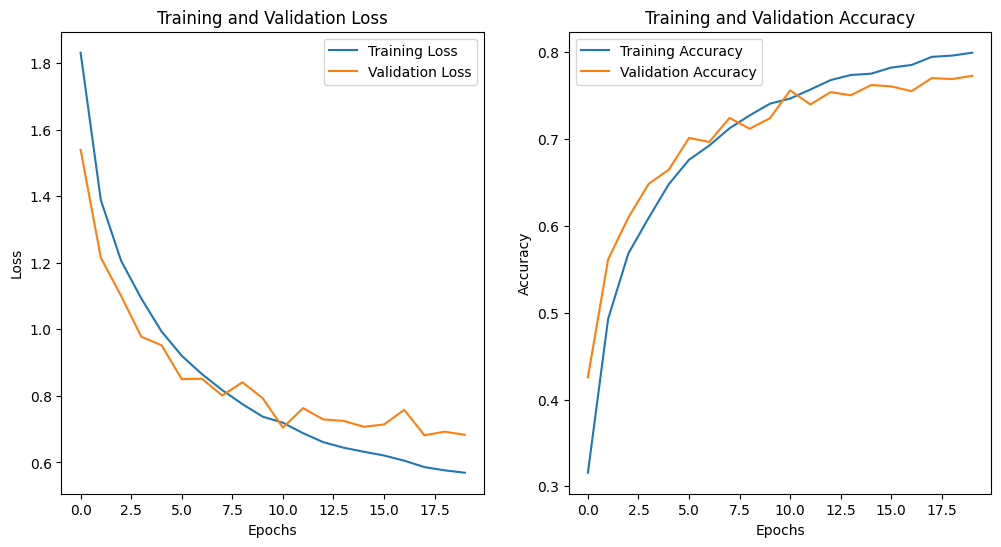

In [9]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 216s 335ms/step - accuracy: 0.3692 - loss: 1.8614 - val_accuracy: 0.5388 - val_loss: 1.3330
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 209s 335ms/step - accuracy: 0.6074 - loss: 1.1069 - val_accuracy: 0.6693 - val_loss: 0.9253
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 265s 340ms/step - accuracy: 0.6931 - loss: 0.8746 - val_accuracy: 0.7163 - val_loss: 0.8106
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 261s 338ms/step - accuracy: 0.7320 - loss: 0.7663 - val_accuracy: 0.7409 - val_loss: 0.7231
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 208s 333ms/step - accuracy: 0.7605 - loss: 0.6895 - val_accuracy: 0.7139 - val_loss: 0.8638
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 260s 330ms/step - accuracy: 0.7821 - loss: 0.6202 - val_accuracy: 0.7118 - val_loss: 0.8257
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 262s 329ms/step - accuracy: 0.7951 - loss: 0.5853 - val_accuracy: 0.7890 - val_loss: 0.6223
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 261s 328ms/step - accuracy: 0.8100 -

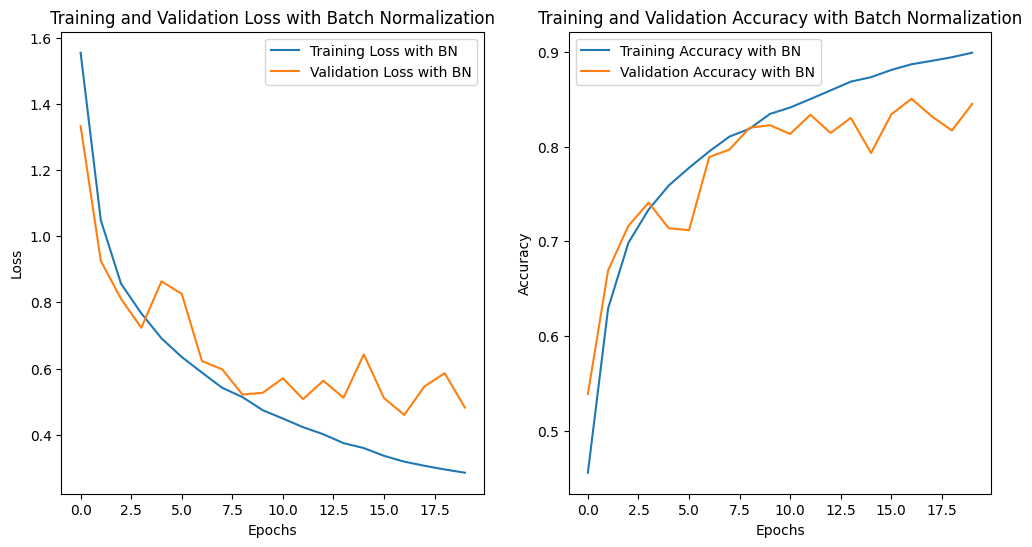

In [10]:
# model with batch normalization
def build_cifar10_model_with_bn():
    model = models.Sequential([
       
        layers.Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Conv2D(32, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

       
        layers.Conv2D(64, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Conv2D(64, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        
        layers.Conv2D(128, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Conv2D(128, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

 
        layers.Flatten(),
        layers.Dense(512),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model


cifar10_model_bn = build_cifar10_model_with_bn()
cifar10_model_bn.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])


history_bn = cifar10_model_bn.fit(train_images, train_labels, 
                                  epochs=20, 
                                  batch_size=64, 
                                  validation_data=(val_images, val_labels))


test_loss_bn, test_acc_bn = cifar10_model_bn.evaluate(test_images, test_labels)
print(f"Model with Batch Normalization Test Accuracy: {test_acc_bn:.4f}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_bn.history['loss'], label='Training Loss with BN')
plt.plot(history_bn.history['val_loss'], label='Validation Loss with BN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss with Batch Normalization')

plt.subplot(1, 2, 2)
plt.plot(history_bn.history['accuracy'], label='Training Accuracy with BN')
plt.plot(history_bn.history['val_accuracy'], label='Validation Accuracy with BN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy with Batch Normalization')
plt.show()
